In [116]:
!pip install git+https://github.com/lnccbrown/HSSM.git

  Cloning https://github.com/lnccbrown/HSSM.git to /tmp/pip-req-build-mop1zuv7
  Running command git clone --filter=blob:none --quiet https://github.com/lnccbrown/HSSM.git /tmp/pip-req-build-mop1zuv7
  Resolved https://github.com/lnccbrown/HSSM.git to commit 19b24538a20938ffc4c8b0bf88ca35d6d51b4196
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [117]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import hssm
import hssm.plotting
import warnings

warnings.filterwarnings('ignore')
exp_data = pd.read_csv('experiment_data.csv')
exp_data

,rt,key_press,correct,coherent_movement_direction,coherence_movement,opposite_coherence_movement,coherent_orientation,coherence_orientation,task_type,task_transition,congruency,experiment_type
0,680,j,True,0,57,42,180,1,mov,NaN,incongruent,-1
1,1381,f,True,0,51,34,180,15,or,switch,incongruent,-1
2,657,j,True,0,72,13,180,15,mov,switch,incongruent,-1
3,866,j,False,180,55,44,0,1,mov,repetition,incongruent,-1
4,873,f,False,0,64,22,0,14,mov,repetition,congruent,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
107,1375,j,True,0,71,27,0,2,or,switch,incongruent,2
108,836,j,False,0,55,32,0,13,mov,switch,incongruent,2
109,1103,j,True,0,71,10,0,19,or,switch,congruent,2
110,871,j,True,0,61,16,0,23,mov,switch,congruent,2


## **Data Preparation**

In [118]:
exp_data_req = exp_data[exp_data['experiment_type']!=-1]
exp_data_req

,rt,key_press,correct,coherent_movement_direction,coherence_movement,opposite_coherence_movement,coherent_orientation,coherence_orientation,task_type,task_transition,congruency,experiment_type
16,765,j,True,0,75,2,0,23,mov,NaN,congruent,0
17,1058,f,False,180,72,10,0,18,or,switch,incongruent,0
18,1363,j,True,180,50,26,0,24,or,repetition,incongruent,0
19,1083,j,True,0,60,36,0,4,mov,switch,congruent,0
20,1403,j,True,180,74,25,0,1,or,switch,incongruent,0
...,...,...,...,...,...,...,...,...,...,...,...,...
107,1375,j,True,0,71,27,0,2,or,switch,incongruent,2
108,836,j,False,0,55,32,0,13,mov,switch,incongruent,2
109,1103,j,True,0,71,10,0,19,or,switch,congruent,2
110,871,j,True,0,61,16,0,23,mov,switch,congruent,2


In [119]:
exp_data_req['left_right'] = exp_data_req['key_press'].replace(['f','j', np.nan],[1,-1, 0]).astype(int)

In [120]:
# if len(exp_data_req[exp_data_req['key_press'].isna() == True]) <= round((len(exp_data_req)*2/100),0):
#   exp_data_req = exp_data_req[exp_data_req['key_press'].isna() == False]

In [121]:
exp_data_req.drop(['coherent_movement_direction', 'coherent_orientation', 'key_press'], axis = 1, inplace = True)
exp_data_req.rename({'correct':'response'},axis=1, inplace = True)
exp_data_req['response'] = exp_data_req['response'].replace([True,False],[1,-1])
exp_data_req['rt'] = exp_data_req['rt']/1000
exp_data_req['coherence_movement'] = exp_data_req['coherence_movement']/100
exp_data_req['opposite_coherence_movement'] = exp_data_req['opposite_coherence_movement']/100
exp_data_req['coherence_orientation'] = exp_data_req['coherence_orientation']/100
exp_data_req

,rt,response,coherence_movement,opposite_coherence_movement,coherence_orientation,task_type,task_transition,congruency,experiment_type,left_right
16,0.765,1,0.75,0.02,0.23,mov,NaN,congruent,0,-1
17,1.058,-1,0.72,0.10,0.18,or,switch,incongruent,0,1
18,1.363,1,0.50,0.26,0.24,or,repetition,incongruent,0,-1
19,1.083,1,0.60,0.36,0.04,mov,switch,congruent,0,-1
20,1.403,1,0.74,0.25,0.01,or,switch,incongruent,0,-1
...,...,...,...,...,...,...,...,...,...,...
107,1.375,1,0.71,0.27,0.02,or,switch,incongruent,2,-1
108,0.836,-1,0.55,0.32,0.13,mov,switch,incongruent,2,-1
109,1.103,1,0.71,0.10,0.19,or,switch,congruent,2,-1
110,0.871,1,0.61,0.16,0.23,mov,switch,congruent,2,-1


In [122]:
label_encoding_column_list = []

for column in exp_data_req.columns:
    if not pd.api.types.is_numeric_dtype(exp_data_req[column]) or pd.api.types.is_bool_dtype(exp_data_req[column]):
        label_encoding_column_list.append(column)
label_encoding_column_list

['task_type', 'task_transition', 'congruency']

In [123]:
for i in label_encoding_column_list:
  label_encoder = LabelEncoder()
  exp_data_req[i]= label_encoder.fit_transform(exp_data_req[i])
exp_data_req

,rt,response,coherence_movement,opposite_coherence_movement,coherence_orientation,task_type,task_transition,congruency,experiment_type,left_right
16,0.765,1,0.75,0.02,0.23,0,2,0,0,-1
17,1.058,-1,0.72,0.10,0.18,1,1,1,0,1
18,1.363,1,0.50,0.26,0.24,1,0,1,0,-1
19,1.083,1,0.60,0.36,0.04,0,1,0,0,-1
20,1.403,1,0.74,0.25,0.01,1,1,1,0,-1
...,...,...,...,...,...,...,...,...,...,...
107,1.375,1,0.71,0.27,0.02,1,1,1,2,-1
108,0.836,-1,0.55,0.32,0.13,0,1,1,2,-1
109,1.103,1,0.71,0.10,0.19,1,1,0,2,-1
110,0.871,1,0.61,0.16,0.23,0,1,0,2,-1


In [124]:
exp_data_req['trial_no_exp_type'] = 1
exp_data_req['trial_no_exp_type'] = exp_data_req.groupby(['experiment_type'])['trial_no_exp_type'].cumsum()
exp_data_req['confidence_exp_type'] = exp_data_req.groupby(['experiment_type'])['response'].cumsum()
exp_data_req['confidence_exp_type'] = exp_data_req['confidence_exp_type']/exp_data_req['trial_no_exp_type']
exp_data_req['confidence_exp_type'] = exp_data_req['confidence_exp_type'].round(2)

In [125]:
# Define a custom function to calculate cumulative sum until a zero appears
def cumulative_sum_until_zero(series):
    cum_sum = 0
    cum_sum_list = []
    for value in series:
        if value == 0:
            cum_sum = 0
        else:
            cum_sum += value
        cum_sum_list.append(cum_sum)
    return cum_sum_list

exp_data_req['win_loss'] = exp_data_req['response'].apply(lambda x: 1 if x == 1 else 0)
exp_data_req['loss_win'] = exp_data_req['response'].apply(lambda x: 0 if x == 1 else 1)

exp_data_req['win_streak_exp_type'] = exp_data_req.groupby(['experiment_type'])['win_loss'].transform(cumulative_sum_until_zero)
exp_data_req['loss_streak_exp_type'] = exp_data_req.groupby(['experiment_type'])['loss_win'].transform(cumulative_sum_until_zero)

In [126]:
exp_data_req['accuracy_exp_type'] = exp_data_req.groupby(['experiment_type'])['win_loss'].cumsum()
exp_data_req['accuracy_exp_type'] = exp_data_req['accuracy_exp_type']/exp_data_req['trial_no_exp_type']
exp_data_req['accuracy_exp_type'] = exp_data_req['accuracy_exp_type'].round(2)
exp_data_req

,rt,response,coherence_movement,opposite_coherence_movement,coherence_orientation,task_type,task_transition,congruency,experiment_type,left_right,trial_no_exp_type,confidence_exp_type,win_loss,loss_win,win_streak_exp_type,loss_streak_exp_type,accuracy_exp_type
16,0.765,1,0.75,0.02,0.23,0,2,0,0,-1,1,1.00,1,0,1,0,1.00
17,1.058,-1,0.72,0.10,0.18,1,1,1,0,1,2,0.00,0,1,0,1,0.50
18,1.363,1,0.50,0.26,0.24,1,0,1,0,-1,3,0.33,1,0,1,0,0.67
19,1.083,1,0.60,0.36,0.04,0,1,0,0,-1,4,0.50,1,0,2,0,0.75
20,1.403,1,0.74,0.25,0.01,1,1,1,0,-1,5,0.60,1,0,3,0,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1.375,1,0.71,0.27,0.02,1,1,1,2,-1,28,0.07,1,0,1,0,0.54
108,0.836,-1,0.55,0.32,0.13,0,1,1,2,-1,29,0.03,0,1,0,1,0.52
109,1.103,1,0.71,0.10,0.19,1,1,0,2,-1,30,0.07,1,0,1,0,0.53
110,0.871,1,0.61,0.16,0.23,0,1,0,2,-1,31,0.10,1,0,2,0,0.55


In [127]:
exp_data_req['overall_trial_no'] = 1
exp_data_req['overall_trial_no'] = exp_data_req['overall_trial_no'].cumsum()
exp_data_req['overall_accuracy'] = exp_data_req['win_loss'].cumsum()
exp_data_req['overall_accuracy'] = exp_data_req['overall_accuracy']/exp_data_req['overall_trial_no']
exp_data_req['overall_confidence'] = exp_data_req['response'].cumsum()
exp_data_req['overall_confidence'] = exp_data_req['overall_confidence']/exp_data_req['overall_trial_no']

exp_data_req['overall_accuracy'] = exp_data_req['overall_accuracy'].round(2)
exp_data_req['overall_confidence'] = exp_data_req['overall_confidence'].round(2)
exp_data_req

,rt,response,coherence_movement,opposite_coherence_movement,coherence_orientation,task_type,task_transition,congruency,experiment_type,left_right,trial_no_exp_type,confidence_exp_type,win_loss,loss_win,win_streak_exp_type,loss_streak_exp_type,accuracy_exp_type,overall_trial_no,overall_accuracy,overall_confidence
16,0.765,1,0.75,0.02,0.23,0,2,0,0,-1,1,1.00,1,0,1,0,1.00,1,1.00,1.00
17,1.058,-1,0.72,0.10,0.18,1,1,1,0,1,2,0.00,0,1,0,1,0.50,2,0.50,0.00
18,1.363,1,0.50,0.26,0.24,1,0,1,0,-1,3,0.33,1,0,1,0,0.67,3,0.67,0.33
19,1.083,1,0.60,0.36,0.04,0,1,0,0,-1,4,0.50,1,0,2,0,0.75,4,0.75,0.50
20,1.403,1,0.74,0.25,0.01,1,1,1,0,-1,5,0.60,1,0,3,0,0.80,5,0.80,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1.375,1,0.71,0.27,0.02,1,1,1,2,-1,28,0.07,1,0,1,0,0.54,92,0.68,0.37
108,0.836,-1,0.55,0.32,0.13,0,1,1,2,-1,29,0.03,0,1,0,1,0.52,93,0.68,0.35
109,1.103,1,0.71,0.10,0.19,1,1,0,2,-1,30,0.07,1,0,1,0,0.53,94,0.68,0.36
110,0.871,1,0.61,0.16,0.23,0,1,0,2,-1,31,0.10,1,0,2,0,0.55,95,0.68,0.37


In [7]:
simple_ddm = hssm.HSSM(data=exp_data_req[['rt', 'response']])

In [8]:
simple_ddm

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: analytical
Observations: 24

Parameters:

v:
    Prior: Normal(mu: 0.0, sigma: 2.0)
    Explicit bounds: (-inf, inf)
a:
    Prior: HalfNormal(sigma: 2.0)
    Explicit bounds: (0.0, inf)
z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)
t:
    Prior: HalfNormal(sigma: 2.0, initval: 0.1)
    Explicit bounds: (0.0, inf)

Lapse probability: 0.05
Lapse distribution: Uniform(lower: 0.0, upper: 10.0)

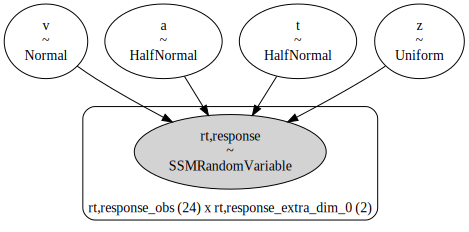

In [9]:
simple_ddm.graph()

In [15]:
simple_ddm.summary()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
v,2.271,0.629,1.139,3.488,0.038,0.027,262.0,222.0,1.00
a,1.875,0.878,0.702,3.530,0.046,0.033,335.0,631.0,1.01
t,0.288,0.104,0.079,0.434,0.006,0.004,241.0,154.0,1.01
z,0.643,0.161,0.348,0.906,0.010,0.007,255.0,358.0,1.00


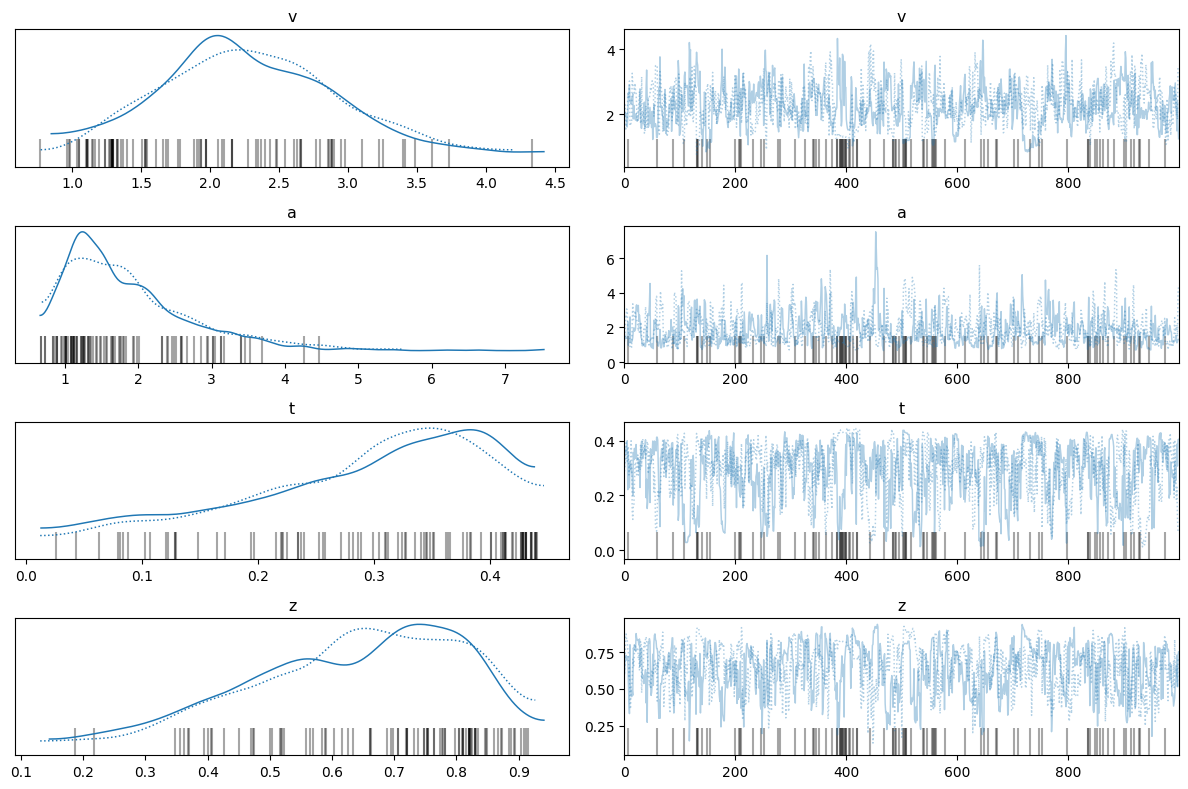

In [12]:
simple_ddm.plot_trace()